In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import and overview of the census data

In [2]:
# Read in census csv
census_data = pd.read_csv("../00_input/census_data.csv", dtype={'ZCTA': 'str'})
census_data.head()

,median_household_income,population,median_age,per_capita_income,poverty_count,unemployment_count,ZCTA
0,13092.0,17242.0,40.5,6999.0,10772.0,2316.0,00601
1,16358.0,38442.0,42.3,9277.0,19611.0,1927.0,00602
2,16603.0,48814.0,41.1,11307.0,24337.0,3124.0,00603
3,12832.0,6437.0,43.3,5943.0,4163.0,230.0,00606
4,19309.0,27073.0,42.1,10220.0,11724.0,1290.0,00610


In [3]:
# Reorder the columns 
census_data = census_data[["ZCTA", "population", "median_age", "median_household_income",
                           "per_capita_income", "poverty_count", "unemployment_count"]]
census_data.head()

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0
3,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0
4,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0


In [4]:
# Overview of the census dataframe
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZCTA                     33120 non-null  object 
 1   population               33120 non-null  float64
 2   median_age               33120 non-null  float64
 3   median_household_income  33085 non-null  float64
 4   per_capita_income        32776 non-null  float64
 5   poverty_count            33085 non-null  float64
 6   unemployment_count       33085 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.8+ MB


## Test number of characters in each ZCTA and its uniqueness

In [5]:
# Test ZCTA length
zcta_length = census_data.ZCTA.apply(len)
print(f"Max zcta length is {zcta_length.max()}.")
print(f"Min zcta length is {zcta_length.min()}.")

Max zcta length is 5.
Min zcta length is 5.


In [6]:
# Test ZCTA uniqueness
census_data.ZCTA.is_unique

True

ZCTA might be chosen as primary key with character length of 5.

## EDA
Using .isnull() allows us to see the number of NaN values in each column of the data set before we decide how to treat them. 

With .decribe() gives us summary statistics of the data frame. However, many of the values in the Median Age, Median Household Income and Per Capita Income columns are negative, which is inaccurate and signals to us that there may be invalid values in multiple columns of the dataset we have pulled. We would have to apply some filters to identify these values.

In [7]:
# Identifying and counting null values in each column in the data frame  
nan_count = census_data.isnull().sum()
nan_count[nan_count > 0].sort_values(ascending=False)

per_capita_income          344
unemployment_count          35
poverty_count               35
median_household_income     35
dtype: int64

In [8]:
# Summary statistics at first glance
census_data.describe()

,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
count,33120.000000,3.312000e+04,3.308500e+04,3.277600e+04,33085.000000,33085.000000
mean,9851.278865,-1.135262e+07,-4.415424e+07,-6.479207e+06,1382.396917,293.679220
std,14614.856872,8.625416e+07,1.659040e+08,6.555433e+07,2664.579362,518.523009
min,0.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000
25%,705.000000,3.660000e+01,4.059500e+04,2.200575e+04,74.000000,13.000000
50%,2803.500000,4.170000e+01,5.250000e+04,2.715100e+04,318.000000,68.000000
75%,13378.500000,4.710000e+01,6.691000e+04,3.389500e+04,1418.000000,343.000000
max,122814.000000,9.830000e+01,2.500010e+05,4.612790e+05,35874.000000,9120.000000


## EDA
Obtaining the min values of each variable allows us to get a better understanding on the extreme values we are dealing with and storing them in variables will allows us to filter these values out. It is evident that three columns: Median Household Income, Median Age and Per Capita Income contain the values '-666,666,666.0'.

By using a groupby, we can see how many times this value comes up in those columns: 564 times in median age, 2194 times in Median Household Income and 320 in Per Capita Income. Upon further research, the US Census Bureau has reported various data collection errors in different states and counties (zip codes that match the ones that have these values) in the 2018 datasets. This could potentially be the reason for these extreme values but there is no concerete explanation by the census for them.

Link: https://www.census.gov/programs-surveys/acs/technical-documentation/errata/120.html

In [9]:
# Get min values for each column and store them in variables for filtering
min_income = census_data['median_household_income'].min()
min_pop = census_data['population'].min()
min_age = census_data['median_age'].min()
min_per_capita = census_data['per_capita_income'].min()
min_poverty = census_data['poverty_count'].min()
min_unemp = census_data['unemployment_count'].min()

print(f"The min Median Household Income is {min_income}")
print(f"The min Population is {min_pop}")
print(f"The min Median Age is {min_age}")
print(f"The min Per Capita Income is {min_per_capita}")
print(f"The min Poverty Count is {min_poverty}")
print(f"The min Unemployment Count is {min_unemp}")

The min Median Household Income is -666666666.0
The min Population is 0.0
The min Median Age is -666666666.0
The min Per Capita Income is -666666666.0
The min Poverty Count is 0.0
The min Unemployment Count is 0.0


In [10]:
# How many times does -666,666,666.0 come up in those three columns 
print(census_data.groupby('median_age').size())
print(census_data.groupby('median_household_income').size())
print(census_data.groupby('per_capita_income').size())

median_age
-666666666.0    564
 2.4              1
 3.0              1
 3.7              1
 3.9              1
               ... 
 87.6             1
 87.8             1
 88.0             1
 88.6             1
 98.3             1
Length: 671, dtype: int64
median_household_income
-666666666.0    2194
 2499.0            4
 6271.0            1
 6878.0            1
 7622.0            1
                ... 
 242557.0          1
 242629.0          1
 243311.0          1
 246813.0          1
 250001.0         15
Length: 19796, dtype: int64
per_capita_income
-666666666.0    320
 42.0             1
 527.0            1
 557.0            1
 612.0            1
               ... 
 201010.0         1
 207327.0         1
 207372.0         1
 279429.0         1
 461279.0         1
Length: 21270, dtype: int64


In [11]:
# Check the rows for Median Age that contain -666,666,666.0
df_age = census_data[census_data['median_age'] == min_age]
df_age

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
110,00950,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0
111,00951,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0
167,01066,9.0,-666666666.0,-666666666.0,NaN,0.0,0.0
206,01199,0.0,-666666666.0,-666666666.0,-666666666.0,0.0,0.0
514,02203,25.0,-666666666.0,-666666666.0,NaN,13.0,0.0
...,...,...,...,...,...,...,...
33080,99923,15.0,-666666666.0,-666666666.0,NaN,0.0,0.0
33099,87539,22.0,-666666666.0,NaN,NaN,NaN,NaN
33100,87554,0.0,-666666666.0,NaN,NaN,NaN,NaN
33106,87581,32.0,-666666666.0,NaN,NaN,NaN,NaN


## EDA
The next two cells show that when Median Age values are -666,666,666.0, the corresponding values in Median Household Income and Per Capita Income are null values. This means we can drop all the rows where Median Age is equal to -666,666,666.0.

In [12]:
# Check unique values in Median HH Income when Median Age = -666,666,666.0
df_age["median_household_income"].unique()

array([-6.66666666e+08,             nan])

In [13]:
# Check unique values in Per Capita Income when Median Age = -666,666,666.0
df_age["per_capita_income"].unique()

array([-6.66666666e+08,             nan])

### Filter out the rows where Median Age = -666,666,666.0 
564 rows were dropped, leaving us with 32,556 rows in our dataset. 
We have done this as having NaN/invalid values in Median HH Income, Median Age and Per Capita Income reduces the analytical potential/usefulness of the dataset. Very little insight can be drawn from just zcta, population, poverty and unemployment count data. 

In [14]:
# Filter out the rows where Median Age = -666666666.0 
clean_census = census_data[census_data['median_age'] != min_age]
clean_census

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0
3,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0
4,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0
...,...,...,...,...,...,...,...
33114,87523,759.0,45.7,NaN,NaN,NaN,NaN
33115,87515,363.0,44.2,NaN,NaN,NaN,NaN
33117,87511,2896.0,36.0,NaN,NaN,NaN,NaN
33118,87578,245.0,48.0,NaN,NaN,NaN,NaN


In [15]:
# Count all null values per column to see what we have left 
nan_count = clean_census.isnull().sum()
nan_count[nan_count > 0].sort_values(ascending=False)

per_capita_income          100
unemployment_count          31
poverty_count               31
median_household_income     31
dtype: int64

In [16]:
# Identify the last 50 rows to find NaN values located at the end of the dataset 
clean_census.tail(50)

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
33064,99826,416.0,52.4,80000.0,43278.0,7.0,22.0
33065,99827,2565.0,45.2,63882.0,33387.0,230.0,52.0
33066,99829,800.0,46.4,63750.0,27546.0,89.0,65.0
33067,99830,595.0,37.5,53625.0,18520.0,53.0,52.0
33068,99832,124.0,56.8,93125.0,45913.0,8.0,8.0
33069,99833,3255.0,41.0,66907.0,33227.0,267.0,70.0
33070,99835,8738.0,38.8,71534.0,38423.0,639.0,216.0
33071,99836,97.0,40.1,69375.0,24227.0,9.0,3.0
33072,99840,1061.0,38.5,72237.0,39842.0,56.0,51.0
33073,99841,155.0,57.8,55833.0,31441.0,6.0,0.0


### Drop the 31 rows with 4 NaN values  
31 rows were dropped, leaving us with 32,525 rows in our dataset. 
For the same reason as before, having those 4 NaN values in those columns reduces the value of this dataset and limits the amount of insights that can be drawn. 

In [17]:
# Drop the 31 rows with 4 NaN values in each row 
clean_census = clean_census.dropna(subset=['median_household_income'])
clean_census

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0
3,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0
4,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0
...,...,...,...,...,...,...,...
33079,99922,330.0,39.5,34028.0,18213.0,129.0,11.0
33081,99925,927.0,43.6,57375.0,25840.0,172.0,89.0
33082,99926,1635.0,34.5,53409.0,22453.0,235.0,138.0
33083,99927,38.0,55.5,-666666666.0,13658.0,28.0,0.0


In [18]:
# Checking if the null values were dropped (there should be 69 null values in Per Capita Income left)
nan_count = clean_census.isnull().sum()
nan_count[nan_count > 0].sort_values(ascending=False)

per_capita_income    69
dtype: int64

## EDA 
We are interested in inspecting the Median Household Income column when Per Capita Income values are null. We observe that there are only three unique, reasonable values and 66, inaccurate values (-666,666,666.0). To further transform this dataset, we we will drop these 66 rows. 

In [19]:
# Filter down to rows that have null values in the Per Capita Income column 
df_per_cap_inc = clean_census.loc[clean_census['per_capita_income'].isnull()]

In [20]:
# Unique values in Median HH Income when Per Capita Income is NaN 
df_per_cap_inc["median_household_income"].unique()

array([-6.66666666e+08,  2.32190000e+04,  3.93640000e+04,  2.49900000e+03])

### Drop the 66 rows with -666,666,666.0 and NaN values  

In [21]:
# Drop ONLY the rows where med HH income = -666,666,666.0 AND per capita income = NaN (66 rows should be dropped)
clean_census = clean_census.loc[~((clean_census['median_household_income'] == min_income) & 
                            (clean_census['per_capita_income'].isnull())),:]
clean_census

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0
3,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0
4,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0
...,...,...,...,...,...,...,...
33079,99922,330.0,39.5,34028.0,18213.0,129.0,11.0
33081,99925,927.0,43.6,57375.0,25840.0,172.0,89.0
33082,99926,1635.0,34.5,53409.0,22453.0,235.0,138.0
33083,99927,38.0,55.5,-666666666.0,13658.0,28.0,0.0


In [22]:
# Checking if the null values were dropped (there should be 69 null values in Per Capita Income left)
nan_count = clean_census.isnull().sum()
nan_count[nan_count > 0].sort_values(ascending=False)

per_capita_income    3
dtype: int64

## EDA
Now that we have dealt with the NaN values in our dataset, we are interested in inspecting the -666,666,666.0 values in the Median Household Income column. The 1568 rows with the values in "Median Household Income" column of -666666666.0 seem to have the other columns with normal-looking values. Hence, we'll only change these -666666666.0 values into NaN to keep the data for further analysis.

In [23]:
# Checking the rows that have -666666666.0 as Median HH income 
df_HH_income = clean_census[clean_census['median_household_income'] == min_income]
df_HH_income

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
42,00694,69.0,73.6,-666666666.0,6880.0,24.0,0.0
86,00786,348.0,64.0,-666666666.0,14278.0,46.0,0.0
107,00934,79.0,32.8,-666666666.0,16956.0,0.0,26.0
108,00936,812.0,77.3,-666666666.0,7132.0,0.0,0.0
117,00960,2221.0,32.8,-666666666.0,3069.0,23.0,6.0
...,...,...,...,...,...,...,...
33027,99757,14.0,60.0,-666666666.0,25536.0,3.0,0.0
33037,99767,60.0,17.5,-666666666.0,18652.0,14.0,3.0
33044,99774,11.0,25.8,-666666666.0,6964.0,9.0,0.0
33058,99790,10.0,50.5,-666666666.0,68700.0,0.0,2.0


### Replace -666,666,666.0 values to NaN 

In [24]:
#  Change remaining -666666666.0 values in Median HH Income to NaN 
clean_census = clean_census.replace(min_income, np.nan)

In [25]:
# Counting all null values per column after -666666666.0 is changed to NaN 
nan_count = clean_census.isnull().sum()
nan_count[nan_count > 0].sort_values(ascending=False)

median_household_income    1568
per_capita_income             3
dtype: int64

## Test merging against ZCTA in the zip_to_zcta mapping data

In [26]:
# Overview of the census data before testing
clean_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32459 entries, 0 to 33084
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZCTA                     32459 non-null  object 
 1   population               32459 non-null  float64
 2   median_age               32459 non-null  float64
 3   median_household_income  30891 non-null  float64
 4   per_capita_income        32456 non-null  float64
 5   poverty_count            32459 non-null  float64
 6   unemployment_count       32459 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.0+ MB


In [27]:
# Read in the zip_to_zcta csv
zip_to_zcta_df = pd.read_csv("../02_transform_zip_zcta/zcta.csv", dtype ='str')
zip_to_zcta_df.head()

,zip_code,ZCTA
0,00501,11742
1,00544,11742
2,00601,00601
3,00602,00602
4,00603,00603


In [28]:
# Merge the zip_to_zcta df against ZCTA in the census data frame using an outer join 
zcta_census = pd.merge(clean_census, zip_to_zcta_df, how="outer", on="ZCTA")
zcta_census.head()

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count,zip_code
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0,00601
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0,00602
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0,00603
3,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0,00604
4,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0,00605


> Firstly, we need to make sure that all of the ZCTAs in our census data frame have a matching ZCTA in the zip_to_zcta dataframe.

In [29]:
# Overview of the merged dataframe 
zcta_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41099 entries, 0 to 41098
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZCTA                     41099 non-null  object 
 1   population               40297 non-null  float64
 2   median_age               40297 non-null  float64
 3   median_household_income  38669 non-null  float64
 4   per_capita_income        40294 non-null  float64
 5   poverty_count            40297 non-null  float64
 6   unemployment_count       40297 non-null  float64
 7   zip_code                 41098 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.8+ MB


As you can see, there are 41,099 non-null ZCTA and 41,098 non-null zip_code. This means that there is one ZCTA in the census table without a matching ZCTA in the zip_to_zcta table. We will drop this row as we will not be able to draw insights from it.

In [30]:
# Identify specific row that has NaN in the zipcode column 
zcta_census[zcta_census["zip_code"].isnull()]

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count,zip_code
38108,95314,95.0,19.4,NaN,8711.0,0.0,0.0,NaN


In [31]:
# Identify the ZCTA to remove from clean_census
zcta_to_remove = zcta_census[zcta_census["zip_code"].isnull()]["ZCTA"].to_list()
zcta_to_remove

['95314']

In [32]:
# Remove the above ZCTA from the census table
final1_census = zcta_census[~zcta_census["ZCTA"].isin(zcta_to_remove)].copy()

In [33]:
final1_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41098 entries, 0 to 41098
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZCTA                     41098 non-null  object 
 1   population               40296 non-null  float64
 2   median_age               40296 non-null  float64
 3   median_household_income  38669 non-null  float64
 4   per_capita_income        40293 non-null  float64
 5   poverty_count            40296 non-null  float64
 6   unemployment_count       40296 non-null  float64
 7   zip_code                 41098 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.8+ MB


> Before the merge, there are 32,459 unique ZCTAs in the clean_census table. Meanwhile, there are 41,098 ZCTAs in the final1_census table. We understand that in the zip_to_zcta data, there would be more than one zip per zcta. With zip_to_zcta outer-merged against ZCTA in clean_census, the ZCTA would be duplicated. Hence we'll drop all duplicated ZCTAs in the final1_census table to make sure that they are unique (to be a primary key).

> The outer merge has been used not only to find out the ZCTA in the census but not in the zip_to_zcta mapping, but also to add all of the remaining ZCTAs currently ONLY in the zip_to_zcta to the census data (with null values in the other columns) to ensure one-to-many relationship between the census table and the zip_to_zcta table.

In [34]:
final1_census.drop_duplicates(subset="ZCTA", keep="first", inplace=True)
final1_census.head()

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count,zip_code
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0,00601
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0,00602
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0,00603
5,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0,00606
6,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0,00610


In [35]:
# Overview of the census table after dropping the duplicated ZCTAs
final1_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33166 entries, 0 to 41098
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZCTA                     33166 non-null  object 
 1   population               32458 non-null  float64
 2   median_age               32458 non-null  float64
 3   median_household_income  30891 non-null  float64
 4   per_capita_income        32455 non-null  float64
 5   poverty_count            32458 non-null  float64
 6   unemployment_count       32458 non-null  float64
 7   zip_code                 33166 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.3+ MB


In [36]:
# Drop zip_code column
final_census = final1_census.drop(columns=["zip_code"])
final_census.head()

,ZCTA,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
0,00601,17242.0,40.5,13092.0,6999.0,10772.0,2316.0
1,00602,38442.0,42.3,16358.0,9277.0,19611.0,1927.0
2,00603,48814.0,41.1,16603.0,11307.0,24337.0,3124.0
5,00606,6437.0,43.3,12832.0,5943.0,4163.0,230.0
6,00610,27073.0,42.1,19309.0,10220.0,11724.0,1290.0


In [37]:
# Overview of the census dataframe after cleaning
final_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33166 entries, 0 to 41098
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZCTA                     33166 non-null  object 
 1   population               32458 non-null  float64
 2   median_age               32458 non-null  float64
 3   median_household_income  30891 non-null  float64
 4   per_capita_income        32455 non-null  float64
 5   poverty_count            32458 non-null  float64
 6   unemployment_count       32458 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.0+ MB


In [38]:
# Use a .describe() to get summary stats of the clean dataset 
summary_stat = round(final_census.describe(),2)
summary_stat

,population,median_age,median_household_income,per_capita_income,poverty_count,unemployment_count
count,32458.00,32458.00,30891.00,32455.00,32458.00,32458.00
mean,10050.24,42.50,59031.43,29913.58,1409.02,299.34
std,14695.46,8.93,25240.24,13870.78,2683.23,521.89
min,5.00,3.70,2499.00,42.00,0.00,0.00
25%,776.00,36.90,42981.00,22191.00,81.00,14.00
50%,2960.00,41.90,53958.00,27250.00,335.00,72.00
75%,13771.00,47.30,68333.00,33996.00,1460.00,354.00
max,122814.00,98.30,250001.00,461279.00,35874.00,9120.00


In [39]:
# Export the census data to csv to load to database
final_census.to_csv('clean_census.csv', index=False)

## Plots 
We are going to look at different plots that map out relationships between different socio-eocnomic measures and outliers in the dataset 

In [40]:
# Store columns in variables 
med_age = final_census['median_age']
med_inc = final_census['median_household_income']
pop = final_census['population']
per_inc = final_census['per_capita_income']
pov_count = final_census['poverty_count']
unemp_count = final_census['unemployment_count']

## Scatter Plots 
The scatter plots below map the relationships between various variables in the census dataset

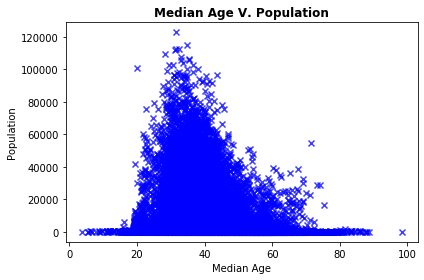

In [41]:
# Generate scatter plot - Population V Median Age
plt.scatter(med_age, pop, marker="x", facecolors="blue", alpha=0.75)
plt.xlabel("Median Age")
plt.ylabel("Population")
plt.title("Median Age V. Population", weight="bold")
plt.tight_layout()

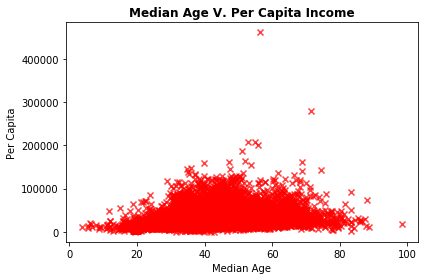

In [42]:
# Generate scatter plot - Median Age V Median HH Income 
plt.scatter(med_age, per_inc, marker="x", facecolors="red", alpha=0.75)
plt.xlabel("Median Age")
plt.ylabel("Per Capita")
plt.title("Median Age V. Per Capita Income", weight="bold")
plt.tight_layout()

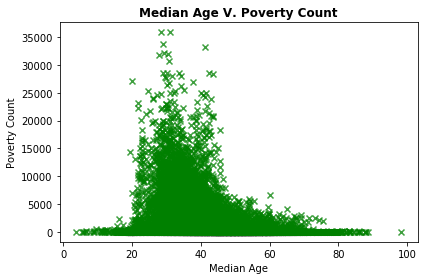

In [43]:
# Generate scatter plot - Median Age V Poverty Count 
plt.scatter(med_age, pov_count, marker="x", facecolors="green", alpha=0.75)
plt.xlabel("Median Age")
plt.ylabel("Poverty Count")
plt.title("Median Age V. Poverty Count", weight="bold")
plt.tight_layout()

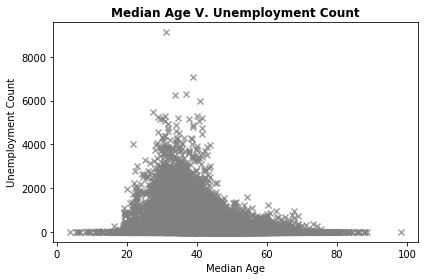

In [44]:
# Generate scatter plot - Median Age V Unemployment Count
plt.scatter(med_age, unemp_count, marker="x", facecolors="grey", alpha=0.75)
plt.xlabel("Median Age")
plt.ylabel("Unemployment Count")
plt.title("Median Age V. Unemployment Count", weight="bold")
plt.tight_layout()